In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing DS related to government composition

gov_final = pd.read_csv(r"C:\Users\ssara\OneDrive\Ambiente de Trabalho\Class 1\5. Projects\Mid Bootcamp Project\mid-bootcamp-project\gov_final.csv")

In [4]:
# Importing DS related to Tax and Social Security rates

tax_ss_final = pd.read_csv(r"C:\Users\ssara\OneDrive\Ambiente de Trabalho\Class 1\5. Projects\Mid Bootcamp Project\mid-bootcamp-project\tax_ss_final.csv")

In [6]:
# Importing DS related to the GDP 

gdp_final = pd.read_csv(r"C:\Users\ssara\OneDrive\Ambiente de Trabalho\Class 1\5. Projects\Mid Bootcamp Project\mid-bootcamp-project\gdp_final.csv")

In [7]:
# Extracting the unique values, sorting, and combining both lists

countries_gov = sorted(list(gov_final['country'].unique()))
countries_tax = sorted(list(tax_ss_final['country'].unique()))
countries_all = set(sorted(countries_gov + countries_tax))

In [8]:
# Ammending the names in the DS tax_ss_final

name_mapping = {
    "United States" : "USA",
    "Czechia": "Czech Republic",
    "Slovak Republic" : "Slovakia"
}

tax_ss_final['country'] = tax_ss_final['country'].replace(name_mapping)

In [9]:
# Confirming the common countries between the 2 DS (Gov and Tax); Counting how many countries are in common

common_countries = set(gov_final['country']).intersection(set(tax_ss_final['country']))
len(common_countries)

29

In [10]:
# Combining DS over the common elements (country and year)

tax_ss_gov = pd.merge(gov_final, tax_ss_final, on=['country', 'year'], how='inner')
tax_ss_gov

,year,country,gov_right1,gov_cent1,gov_left1,gov_party,value
0,2000,Australia,100.000000,0.00,0.0,1.0,26.596612
1,2001,Australia,100.000000,0.00,0.0,1.0,23.070763
2,2002,Australia,100.000000,0.00,0.0,1.0,23.507561
3,2003,Australia,100.000000,0.00,0.0,1.0,23.941360
4,2004,Australia,100.000000,0.00,0.0,1.0,23.884310
...,...,...,...,...,...,...,...
633,2017,USA,81.890000,4.90,0.0,1.0,26.099939
634,2018,USA,92.730000,0.00,0.0,1.0,23.791327
635,2019,USA,94.120000,0.00,0.0,1.0,23.879935
636,2020,USA,94.117647,0.00,0.0,1.0,24.279443


In [11]:
# Ammending the names in the DS GDP

gdp_final['country'] = gdp_final['country'].replace(name_mapping)

In [12]:
# Creating new DS for the GDP with only the countires that exist in the other DS
gdp_same_countries = gdp_final[gdp_final['country'].isin(common_countries)]

In [13]:
# Transforming the headers (years) in rows

gdp_final_2 = pd.melt(gdp_same_countries, id_vars=['country'], var_name='year', value_name='gdp')

In [15]:
# Data type confirmation

gdp_final_2.dtypes

country     object
year        object
gdp        float64
dtype: object

In [16]:
# Data type confirmation

tax_ss_gov.dtypes

year            int64
country        object
gov_right1    float64
gov_cent1     float64
gov_left1     float64
gov_party     float64
value         float64
dtype: object

In [17]:
# Converting 'year' to an interger

gdp_final_2['year'] = gdp_final_2['year'].astype(int)

In [18]:
# Joining DS Tax/GOV and GDP by the common variables 

tax_ss_gov_gdp = pd.merge(tax_ss_gov, gdp_final_2, on=['country', 'year'], how='inner')
tax_ss_gov_gdp

,year,country,gov_right1,gov_cent1,gov_left1,gov_party,value,gdp
0,2000,Australia,100.000000,0.00,0.0,1.0,26.596612,4.158450e+11
1,2001,Australia,100.000000,0.00,0.0,1.0,23.070763,3.793578e+11
2,2002,Australia,100.000000,0.00,0.0,1.0,23.507561,3.955730e+11
3,2003,Australia,100.000000,0.00,0.0,1.0,23.941360,4.674980e+11
4,2004,Australia,100.000000,0.00,0.0,1.0,23.884310,6.143264e+11
...,...,...,...,...,...,...,...,...
633,2017,USA,81.890000,4.90,0.0,1.0,26.099939,1.947734e+13
634,2018,USA,92.730000,0.00,0.0,1.0,23.791327,2.053306e+13
635,2019,USA,94.120000,0.00,0.0,1.0,23.879935,2.138098e+13
636,2020,USA,94.117647,0.00,0.0,1.0,24.279443,2.106047e+13


In [19]:
# Below I created five DS derived from the one above. This DS where backups that I used along the code:

# Creating a Main DS
tax_ss_gov_gdp_main = tax_ss_gov_gdp
# Creating other DS V1
tax_ss_gov_gdp_v1 = tax_ss_gov_gdp
# Creating other DS V2
tax_ss_gov_gdp_v2 = tax_ss_gov_gdp
# Creating other DS V3
tax_ss_gov_gdp_v3 = tax_ss_gov_gdp
# Creating other DS v4
tax_ss_gov_gdp_v4 = tax_ss_gov_gdp

In [20]:
# Converting the 'gov_party' column from string type to integer type

tax_ss_gov_gdp['gov_party'] = tax_ss_gov_gdp['gov_party'].astype(int) 
tax_ss_gov_gdp['gov_party'].value_counts()

1    256
2    122
3    118
4     73
5     69
Name: gov_party, dtype: int64

In [21]:
# Creating Dummy Variables for Categorical Column 'gov_party' - One-hot enconding

tax_ss_gov_gdp = pd.get_dummies(tax_ss_gov_gdp, columns=['gov_party'], prefix='gov_party')

In [22]:
# Creating and Fitting a Linear Regression Model where 'gdp' is the dependent variable and the independent variables are the dummy variables representing different government party factions.

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model_gdp = ols('gdp ~ gov_party_1 + gov_party_2 + gov_party_3 + gov_party_4 + gov_party_5', data=tax_ss_gov_gdp).fit()
anova_results = anova_lm(model_gdp)
anova_results

,df,sum_sq,mean_sq,F,PR(>F)
gov_party_1,1.0,4.857683e+26,4.857683e+26,56.151165,2.269267e-13
gov_party_2,1.0,3.725783e+24,3.725783e+24,0.430673,5.118976e-01
gov_party_3,1.0,9.893249e+21,9.893249e+21,0.001144,9.730338e-01
gov_party_4,1.0,1.405650e+25,1.405650e+25,1.624825,2.028880e-01
gov_party_5,1.0,8.330499e+24,8.330499e+24,0.962943,3.268214e-01
Residual,633.0,5.476135e+27,8.651082e+24,NaN,NaN


In [23]:
'''

gov_party_1: The F-statistic is significant (p-value < 0.05)
Thus, Hegemony of Right is statistically significant in explaining the GDP.

gov_party_2, gov_party_3, gov_party_4, gov_party_5: The F-statistics for these levels are not statistically significant
(p-value > 0.05). 
Thus, they do not provide a significance in explaining the GDP.

'''

'\n\ngov_party_1: The F-statistic is significant (p-value < 0.05)\nThus, Hegemony of Right is statistically significant in explaining the GDP.\n\ngov_party_2, gov_party_3, gov_party_4, gov_party_5: The F-statistics for these levels are not statistically significant\n(p-value > 0.05). \nThus, they do not provide a significance in explaining the GDP.\n\n'

In [24]:
model_tax = ols('value ~ gov_party_1 + gov_party_2 + gov_party_3 + gov_party_4 + gov_party_5', data=tax_ss_gov_gdp).fit()
anova_results = anova_lm(model_tax)
anova_results

,df,sum_sq,mean_sq,F,PR(>F)
gov_party_1,1.0,487.716516,487.716516,14.236432,1.763552e-04
gov_party_2,1.0,1368.178349,1368.178349,39.937090,4.948626e-10
gov_party_3,1.0,1658.409422,1658.409422,48.408928,8.659289e-12
gov_party_4,1.0,98.877646,98.877646,2.886236,8.983080e-02
gov_party_5,1.0,15.337241,15.337241,0.447694,5.036762e-01
Residual,633.0,21685.528134,34.258338,NaN,NaN


In [25]:
''' 

'gov_party_1', 'gov_party_2', and 'gov_party_3' are statistically significant in explaining the GDP
'gov_party_4' and 'gov_party_5' are not significant. 

'''

" \n\n'gov_party_1', 'gov_party_2', and 'gov_party_3' are statistically significant in explaining the GDP\n'gov_party_4' and 'gov_party_5' are not significant. \n\n"

In [27]:
# Calculating and analyzing the variation in tax rates over time during different governmental mandates in various countries, per mandate.

tax_ss_gov_gdp_v1 = tax_ss_gov_gdp_v1.sort_values(by=['country', 'gov_party', 'year'])

def calculate_mandate_variation(group):
    group['tax_rate_variation_per_gov'] = group['value'].diff()
    return group

tax_ss_gov_gdp_v1['mandate'] = tax_ss_gov_gdp_v1.groupby(['country', 'gov_party'])['year'].diff().ne(1).cumsum()
tax_ss_gov_gdp_v1 = tax_ss_gov_gdp_v1.groupby(['country', 'gov_party', 'mandate']).apply(calculate_mandate_variation)

tax_ss_gov_gdp_v1['tax_rate_variation_per_gov'] = tax_ss_gov_gdp_v1.groupby(['country', 'gov_party', 'mandate'])['value'].pct_change()

tax_ss_gov_gdp_v1.reset_index(drop=True, inplace=True)

In [30]:
tax_ss_gov_gdp_v1[tax_ss_gov_gdp_v1['country']=='Portugal'].sort_values(by='year')

,year,country,gov_right1,gov_cent1,gov_left1,gov_party,value,gdp,mandate,tax_rate_variation_per_gov
470,2000,Portugal,0.00000,0.0,69.670000,4,22.448104,1.186052e+11,140,NaN
471,2001,Portugal,0.00000,0.0,57.890000,4,21.340733,1.216041e+11,140,-0.049330
467,2002,Portugal,69.35000,0.0,15.390000,2,22.744707,1.347956e+11,137,NaN
462,2003,Portugal,94.44000,0.0,0.000000,1,22.493616,1.652262e+11,135,NaN
463,2004,Portugal,94.69000,0.0,0.000000,1,22.532698,1.893821e+11,135,0.001737
472,2005,Portugal,18.22000,0.0,42.790000,4,21.785167,1.972539e+11,141,NaN
473,2006,Portugal,0.00000,0.0,55.870000,4,22.685766,2.087564e+11,141,0.041340
474,2007,Portugal,0.00000,0.0,55.130000,4,22.440200,2.404961e+11,141,-0.010825
475,2008,Portugal,0.00000,0.0,58.360000,4,21.971795,2.634164e+11,141,-0.020873
476,2009,Portugal,0.00000,0.0,58.820000,4,21.464629,2.446678e+11,141,-0.023083


In [34]:
# Calculating and analyzing the variation in tax rates over time during in various countries

tax_ss_gov_gdp_v2 = tax_ss_gov_gdp_v2.sort_values(by=['country', 'year'])

tax_ss_gov_gdp_v2['tax_rate_variation_per_year'] = tax_ss_gov_gdp_v2.groupby(['country'])['value'].pct_change()

tax_ss_gov_gdp_v2.reset_index(drop=True, inplace=True)

In [35]:
# Calculating and analyzing the variation in GDP over time during different governmental mandates in various countries, per mandate.

tax_ss_gov_gdp_v3 = tax_ss_gov_gdp_v3.sort_values(by=['country', 'gov_party', 'year'])

def calculate_mandate_variation_2(group):
    group['gdp_variation_per_gov'] = group['gdp'].diff()
    return group

tax_ss_gov_gdp_v3['mandate'] = tax_ss_gov_gdp_v3.groupby(['country', 'gov_party'])['year'].diff().ne(1).cumsum()
tax_ss_gov_gdp_v3 = tax_ss_gov_gdp_v3.groupby(['country', 'gov_party', 'mandate']).apply(calculate_mandate_variation_2)

tax_ss_gov_gdp_v3['gdp_variation_per_gov'] = tax_ss_gov_gdp_v3.groupby(['country', 'gov_party', 'mandate'])['gdp'].pct_change()

tax_ss_gov_gdp_v3.reset_index(drop=True, inplace=True)

In [36]:
# My confirmation

tax_ss_gov_gdp_v3[tax_ss_gov_gdp_v3['country']=='Portugal'].sort_values(by='year')

,year,country,gov_right1,gov_cent1,gov_left1,gov_party,value,gdp,mandate,gdp_variation_per_gov
470,2000,Portugal,0.00000,0.0,69.670000,4,22.448104,1.186052e+11,140,NaN
471,2001,Portugal,0.00000,0.0,57.890000,4,21.340733,1.216041e+11,140,0.025285
467,2002,Portugal,69.35000,0.0,15.390000,2,22.744707,1.347956e+11,137,NaN
462,2003,Portugal,94.44000,0.0,0.000000,1,22.493616,1.652262e+11,135,NaN
463,2004,Portugal,94.69000,0.0,0.000000,1,22.532698,1.893821e+11,135,0.146199
472,2005,Portugal,18.22000,0.0,42.790000,4,21.785167,1.972539e+11,141,NaN
473,2006,Portugal,0.00000,0.0,55.870000,4,22.685766,2.087564e+11,141,0.058314
474,2007,Portugal,0.00000,0.0,55.130000,4,22.440200,2.404961e+11,141,0.152042
475,2008,Portugal,0.00000,0.0,58.360000,4,21.971795,2.634164e+11,141,0.095304
476,2009,Portugal,0.00000,0.0,58.820000,4,21.464629,2.446678e+11,141,-0.071175


In [37]:
# Calculating and analyzing the variation in GDP over time during in various countries

tax_ss_gov_gdp_v4 = tax_ss_gov_gdp_v3.sort_values(by=['country', 'year'])

tax_ss_gov_gdp_v4['gdp_variation_per_year'] = tax_ss_gov_gdp_v4.groupby(['country'])['gdp'].pct_change()

tax_ss_gov_gdp_v4.reset_index(drop=True, inplace=True)

In [38]:
# Backup of the main dataset

tax_ss_gov_gdp_main_2 = tax_ss_gov_gdp_main

In [39]:
# Merge tax_rate_variation_per_gov from tax_ss_gov_gdp_v1
tax_ss_gov_gdp_main = pd.merge(tax_ss_gov_gdp_main, tax_ss_gov_gdp_v1[['country', 'year', 'tax_rate_variation_per_gov']], on=['country', 'year'], how='left')

# Merge tax_rate_variation_per_year from tax_ss_gov_gdp_v2
tax_ss_gov_gdp_main = pd.merge(tax_ss_gov_gdp_main, tax_ss_gov_gdp_v2[['country', 'year', 'tax_rate_variation_per_year']], on=['country', 'year'], how='left')

# Merge gdp_variation_per_gov from tax_ss_gov_gdp_v3
tax_ss_gov_gdp_main = pd.merge(tax_ss_gov_gdp_main, tax_ss_gov_gdp_v3[['country', 'year', 'gdp_variation_per_gov']], on=['country', 'year'], how='left')

# Merge gdp_variation_per_year from tax_ss_gov_gdp_v4
tax_ss_gov_gdp_main = pd.merge(tax_ss_gov_gdp_main, tax_ss_gov_gdp_v4[['country', 'year', 'gdp_variation_per_year']], on=['country', 'year'], how='left')

In [40]:
tax_ss_gov_gdp_main

,year,country,gov_right1,gov_cent1,gov_left1,gov_party,value,gdp,tax_rate_variation_per_gov,tax_rate_variation_per_year,gdp_variation_per_gov,gdp_variation_per_year
0,2000,Australia,100.000000,0.00,0.0,1,26.596612,4.158450e+11,NaN,NaN,NaN,NaN
1,2001,Australia,100.000000,0.00,0.0,1,23.070763,3.793578e+11,-0.132568,-0.132568,-0.087742,-0.087742
2,2002,Australia,100.000000,0.00,0.0,1,23.507561,3.955730e+11,0.018933,0.018933,0.042744,0.042744
3,2003,Australia,100.000000,0.00,0.0,1,23.941360,4.674980e+11,0.018454,0.018454,0.181825,0.181825
4,2004,Australia,100.000000,0.00,0.0,1,23.884310,6.143264e+11,-0.002383,-0.002383,0.314073,0.314073
...,...,...,...,...,...,...,...,...,...,...,...,...
633,2017,USA,81.890000,4.90,0.0,1,26.099939,1.947734e+13,0.010726,0.010726,0.041841,0.041841
634,2018,USA,92.730000,0.00,0.0,1,23.791327,2.053306e+13,-0.088453,-0.088453,0.054203,0.054203
635,2019,USA,94.120000,0.00,0.0,1,23.879935,2.138098e+13,0.003724,0.003724,0.041295,0.041295
636,2020,USA,94.117647,0.00,0.0,1,24.279443,2.106047e+13,0.016730,0.016730,-0.014990,-0.014990


In [41]:
# Droping the remaining columns related to the gov structure 

columns_to_drop = ['gov_right1', 'gov_cent1', 'gov_left1']
tax_ss_gov_gdp_final_last = tax_ss_gov_gdp_main.drop(columns=columns_to_drop)

In [42]:
tax_ss_gov_gdp_final_last

,year,country,gov_party,value,gdp,tax_rate_variation_per_gov,tax_rate_variation_per_year,gdp_variation_per_gov,gdp_variation_per_year
0,2000,Australia,1,26.596612,4.158450e+11,NaN,NaN,NaN,NaN
1,2001,Australia,1,23.070763,3.793578e+11,-0.132568,-0.132568,-0.087742,-0.087742
2,2002,Australia,1,23.507561,3.955730e+11,0.018933,0.018933,0.042744,0.042744
3,2003,Australia,1,23.941360,4.674980e+11,0.018454,0.018454,0.181825,0.181825
4,2004,Australia,1,23.884310,6.143264e+11,-0.002383,-0.002383,0.314073,0.314073
...,...,...,...,...,...,...,...,...,...
633,2017,USA,1,26.099939,1.947734e+13,0.010726,0.010726,0.041841,0.041841
634,2018,USA,1,23.791327,2.053306e+13,-0.088453,-0.088453,0.054203,0.054203
635,2019,USA,1,23.879935,2.138098e+13,0.003724,0.003724,0.041295,0.041295
636,2020,USA,1,24.279443,2.106047e+13,0.016730,0.016730,-0.014990,-0.014990


In [43]:
# Checking
tax_ss_gov_gdp_final_last[tax_ss_gov_gdp_final_last['country']=='Estonia']

,year,country,gov_party,value,gdp,tax_rate_variation_per_gov,tax_rate_variation_per_year,gdp_variation_per_gov,gdp_variation_per_year
132,2000,Estonia,2,21.941463,5.686580e+09,NaN,NaN,NaN,NaN
133,2001,Estonia,2,21.481993,6.254650e+09,-0.020941,-0.020941,0.099897,0.099897
134,2002,Estonia,2,22.688210,7.367976e+09,0.056150,0.056150,0.178000,0.178000
135,2003,Estonia,1,23.000293,9.874013e+09,NaN,0.013755,NaN,0.340126
136,2004,Estonia,1,21.860916,1.214591e+10,-0.049537,-0.049537,0.230089,0.230089
137,2005,Estonia,1,19.796496,1.410679e+10,-0.094434,-0.094434,0.161443,0.161443
138,2006,Estonia,1,18.730058,1.702287e+10,-0.053870,-0.053870,0.206715,0.206715
139,2007,Estonia,2,18.693093,2.244913e+10,NaN,-0.001974,NaN,0.318763
140,2008,Estonia,2,17.866281,2.434168e+10,-0.044231,-0.044231,0.084304,0.084304
141,2009,Estonia,2,18.564575,1.963303e+10,0.039084,0.039084,-0.193440,-0.193440


In [44]:
# Saving the last version to use in Tableau

tax_ss_gov_gdp_final_last.to_csv('tax_ss_gov_gdp_final_last.csv', index=False)
tax_ss_gov_gdp_final_last.to_excel('tax_ss_gov_gdp_final_last.xlsx', index=False)

In [45]:
# Importing libraires for visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

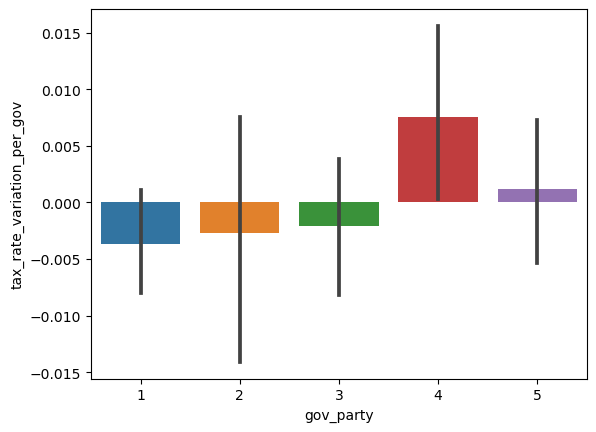

In [46]:
sns.barplot(x=tax_ss_gov_gdp_final_last['gov_party'], y=tax_ss_gov_gdp_final_last['tax_rate_variation_per_gov'], data=tax_ss_gov_gdp_final_last, estimator='mean') 
plt.show()

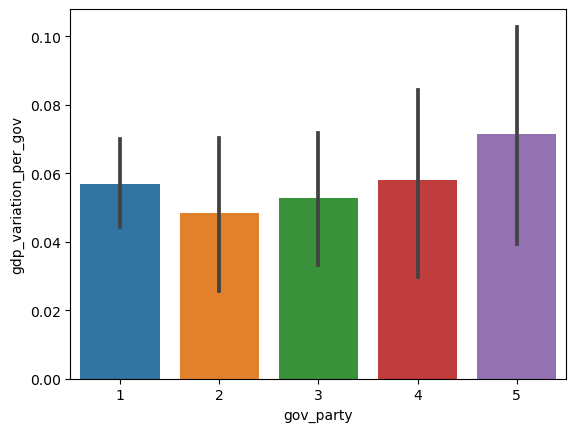

In [47]:
sns.barplot(x=tax_ss_gov_gdp_final_last['gov_party'], y=tax_ss_gov_gdp_final_last['gdp_variation_per_gov'], data=tax_ss_gov_gdp_final_last, estimator='mean') 
plt.show()